In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path = "../data/raw/sample_labels.csv"
df = pd.read_csv(file_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  5606 non-null   object 
 1   Finding Labels               5606 non-null   object 
 2   Follow-up #                  5606 non-null   int64  
 3   Patient ID                   5606 non-null   int64  
 4   Patient Age                  5606 non-null   object 
 5   Patient Gender               5606 non-null   object 
 6   View Position                5606 non-null   object 
 7   OriginalImageWidth           5606 non-null   int64  
 8   OriginalImageHeight          5606 non-null   int64  
 9   OriginalImagePixelSpacing_x  5606 non-null   float64
 10  OriginalImagePixelSpacing_y  5606 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 481.9+ KB


In [4]:
#checking for missing values
df.isnull().sum()

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImageWidth             0
OriginalImageHeight            0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: Finding Labels, Length: 244, dtype: int64


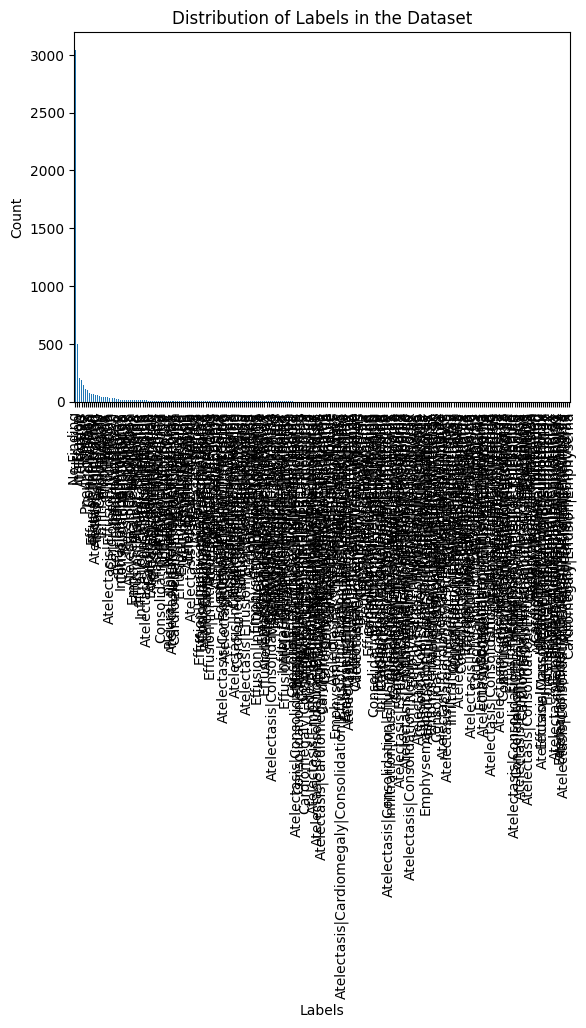

In [6]:
label_counts = df['Finding Labels'].value_counts()
print(label_counts)
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.show()

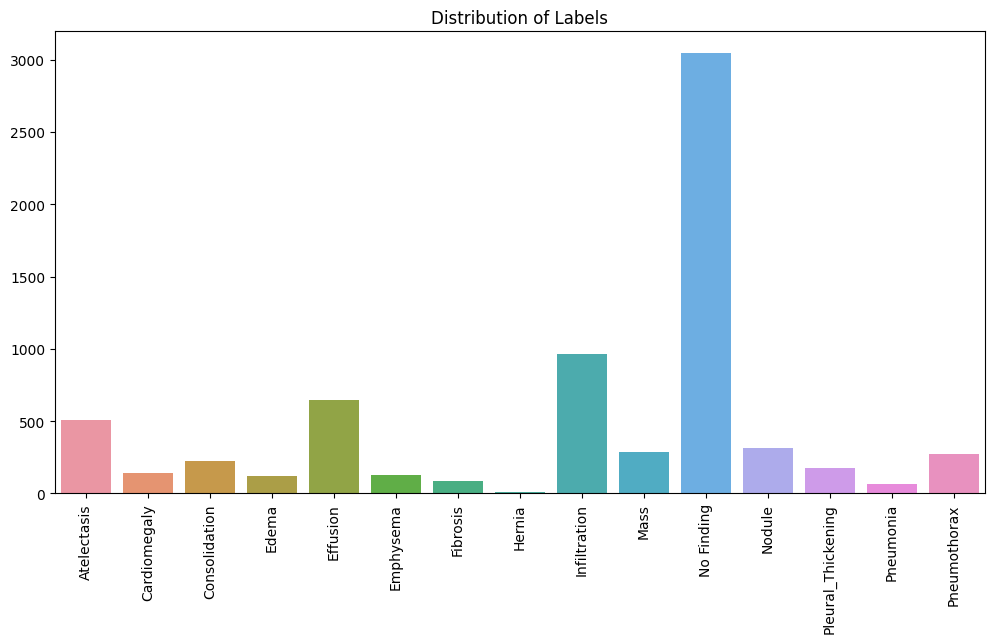

In [11]:
all_labels = pd.get_dummies(df['Finding Labels'].str.split('|', expand=True).stack()).groupby(level=0).sum()

# Visualize distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=all_labels.columns, y=all_labels.sum())
plt.xticks(rotation=90)
plt.title("Distribution of Labels")
plt.show()


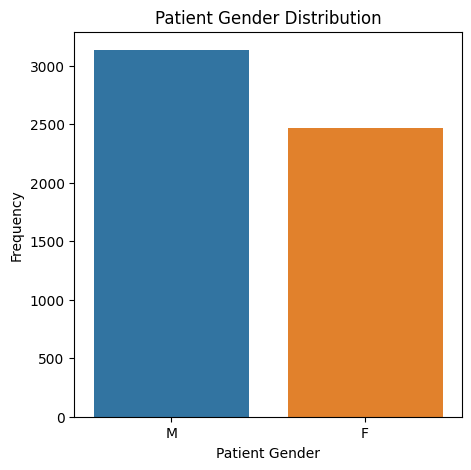

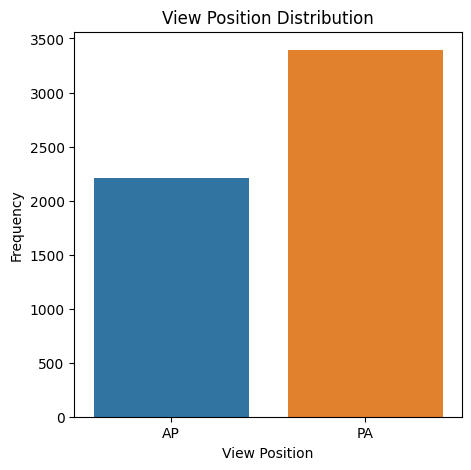

In [32]:

# Patient gender distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="Patient Gender")
plt.title("Patient Gender Distribution")
plt.ylabel("Frequency")
plt.show()

# View position distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="View Position")
plt.title("View Position Distribution")
plt.ylabel("Frequency")
plt.show()


In [35]:
#Data preparation

gender_dummies = pd.get_dummies(df["Patient Gender"])

view_dummies = pd.get_dummies(df["View Position"])

df = pd.concat([
    df, 
    gender_dummies, 
    view_dummies], 
    axis=1
)